# MNIST Image Classification
## Digit Recognizer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
mnist=pd.read_csv("DigitRecognizerTrain.csv")

In [6]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
type(mnist)

pandas.core.frame.DataFrame

In [8]:
mnist.shape

(42000, 785)

Here there are total 42000 rows that will give us detail of 28 X 28 = 784 pixels in photo of digits from 0 to 9 

out of 785, 784 cols corresponds to reshaped 28 X 28 pixels image - (pixel0 to pixel783) and 1 col tell the digit which is written in given image - (label)

In [4]:
X=mnist.iloc[:,1:].values
# Y=mnist.iloc[:,0:1].values
Y=mnist['label'].values

In [45]:
X.shape

(42000, 784)

In [46]:
Y.shape

(42000,)

In [47]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
Y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [51]:
X_train.shape

(33600, 784)

In [52]:
X_test.shape

(8400, 784)

In [53]:
Y_train.shape

(33600,)

In [54]:
Y_test.shape

(8400,)

In [55]:
def plot_image(img):
    plt.imshow(img.reshape(28,28),cmap="gray")
    plt.show()

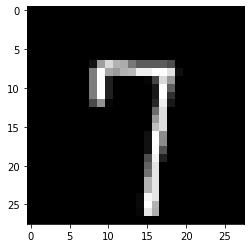

7


In [56]:
plot_image(X[50])
print(Y[50])

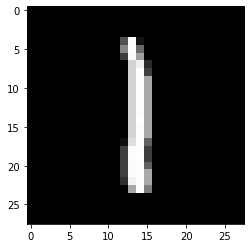

1


In [57]:
plot_image(X[1000])
print(Y[1000])

In [58]:
#Lets use kNN

In [61]:
def distance(pA,pB):
    return np.sum((pA-pB)**2)**0.5

In [66]:
def kNN(X,Y,query,k=5):
    """
    X --> (m,n) np-array
    Y --> (n,) np-array
    query --> (2,) np-array
    k --> count of nearest neighbours to be considered
    
    This kNN is for Classification
    """
    
    m=X.shape[0]
    #n=X.shape[1]
    
    distances=[]
    for i in range(m):
        dis=distance(X[i],query)
        distances.append((dis,Y[i]))
        
    distances=sorted(distances)
    distances=distances[:k]
    distances=np.array(distances)
    labels=distances[:,1]
    uniq_label,count=np.unique(labels,return_counts=True)
    pred=uniq_label[count.argmax()]
    
    return int(pred)

In [68]:
print(kNN(X_train,Y_train,X_test[3000]))
print(Y_test[3000])

6
6


In [69]:
print(kNN(X_train,Y_train,X_test[5263]))
print(Y_test[5263])

7
7


In [71]:
# Lets predict for 100 images and calculate accuracy

In [72]:
predictions=[]
for i in range(100):
    p=kNN(X_train,Y_train,X_test[i],k=7)
    predictions.append(p)

In [73]:
predictions

[2,
 2,
 5,
 4,
 7,
 6,
 5,
 1,
 5,
 3,
 9,
 4,
 5,
 3,
 3,
 9,
 4,
 8,
 5,
 2,
 7,
 9,
 2,
 0,
 7,
 4,
 6,
 3,
 1,
 8,
 8,
 1,
 6,
 4,
 1,
 3,
 4,
 8,
 7,
 2,
 8,
 0,
 3,
 1,
 9,
 3,
 1,
 4,
 6,
 6,
 4,
 3,
 2,
 9,
 3,
 2,
 0,
 7,
 4,
 9,
 7,
 1,
 9,
 7,
 3,
 6,
 6,
 8,
 7,
 3,
 1,
 9,
 7,
 8,
 7,
 6,
 4,
 0,
 1,
 6,
 8,
 7,
 6,
 5,
 9,
 4,
 7,
 4,
 9,
 8,
 2,
 0,
 8,
 7,
 2,
 9,
 3,
 5,
 4,
 7]

In [75]:
predictions=np.array(predictions)

In [79]:
acc=(Y_test[:100]==predictions).sum()/len(predictions)

In [80]:
print(acc)

0.99


# Using kNN of sklearn

In [8]:
# import kNN
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# create object
kNNsklearn=KNeighborsClassifier()

In [10]:
# fitting/training
kNNsklearn.fit(X_train,Y_train)

KNeighborsClassifier()

In [85]:
# predicting
kNNsklearn.predict([X_test[4586]])

array([2], dtype=int64)

In [86]:
Y_test[4586]

2

In [91]:
X_test.shape

(8400, 784)

In [98]:
predictions=[]
for i in range(100):
    p=kNNsklearn.predict([X_test[i]])
    predictions.append(int(p)) # or p[0]

In [99]:
predictions=np.array(predictions)

In [100]:
predictions

array([2, 2, 5, 4, 7, 6, 5, 1, 5, 3, 9, 4, 5, 3, 3, 9, 4, 8, 5, 2, 7, 9,
       2, 0, 7, 4, 6, 3, 1, 8, 8, 1, 6, 4, 1, 3, 4, 8, 7, 2, 8, 0, 3, 1,
       9, 3, 1, 4, 6, 6, 4, 3, 2, 9, 3, 2, 0, 7, 4, 9, 7, 1, 9, 7, 3, 6,
       6, 8, 7, 3, 1, 9, 7, 8, 7, 6, 4, 0, 1, 6, 8, 7, 6, 5, 9, 4, 7, 4,
       9, 8, 2, 0, 8, 7, 2, 9, 3, 5, 4, 7])

In [101]:
acc=(Y_test[:100]==predictions).sum()/len(predictions)

In [102]:
print(acc)

0.99


In [11]:
predictions=np.array(kNNsklearn.predict(X_test[:100]))

In [12]:
predictions

array([2, 2, 5, 4, 7, 6, 5, 1, 5, 3, 9, 4, 5, 3, 3, 9, 4, 8, 5, 2, 7, 9,
       2, 0, 7, 4, 6, 3, 1, 8, 8, 1, 6, 4, 1, 3, 4, 8, 7, 2, 8, 0, 3, 1,
       9, 3, 1, 4, 6, 6, 4, 3, 2, 9, 3, 2, 0, 7, 4, 9, 7, 1, 9, 7, 3, 6,
       6, 8, 7, 3, 1, 9, 7, 8, 7, 6, 4, 0, 1, 6, 8, 7, 6, 5, 9, 4, 7, 4,
       9, 8, 2, 0, 8, 7, 2, 9, 3, 5, 4, 7], dtype=int64)

In [13]:
(Y_test[:100]==predictions).sum()/len(predictions)

0.99